In [2]:
# importing the dataset
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',
]

# Read the CSV file from the URL and assign column names
df = pd.read_csv(url, names=header, na_values='?')

# Display the first few rows of the DataFrame
print(df.head())


   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

    Column Number          Attribute  Missing Values
0               1          symboling               0
1               2  normalized-losses              37
2               3               make               0
3               4          fuel-type               0
4               5         aspiration               0
5               6       num-of-doors               2
6               7         body-style               0
7               8       drive-wheels               0
8               9    engine-location               0
9              10         wheel-base               0
10             11             length               0
11             12              width               0
12             13             height               0
13             14        curb-weight               0
14             15        engine-type               0
15             16   num-of-cylinders               0
16             17        engine-size               0
17             18        fuel-system          

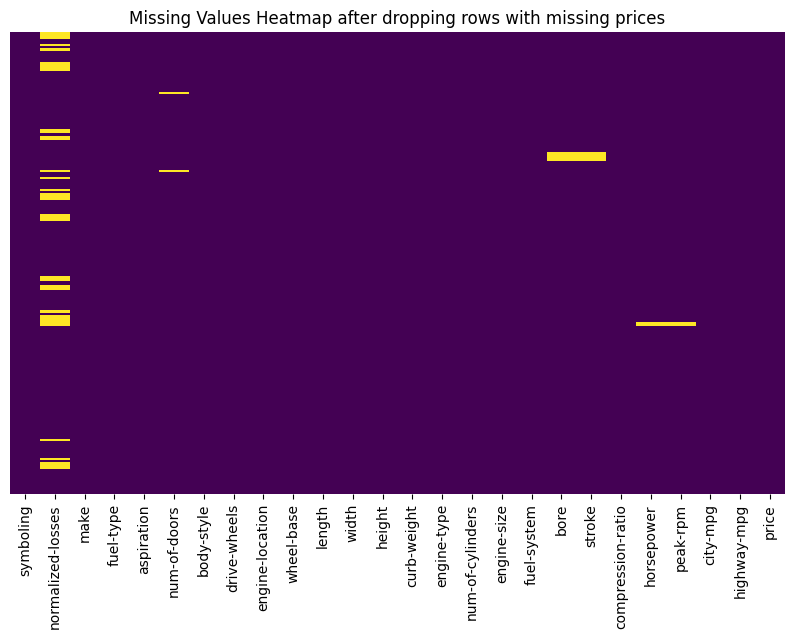

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns


# Drop rows with missing prices
df_cleaned = df.dropna(subset=['price'])

# Verify the number of missing values for each attribute after dropping rows
missing_values_info_cleaned = df_cleaned.isnull().sum().reset_index()
missing_values_info_cleaned.columns = ['Attribute', 'Missing Values']
missing_values_info_cleaned.insert(0, 'Column Number', missing_values_info_cleaned.index + 1)  # Adding 1 to match 1-based indexing

print(missing_values_info_cleaned)

# Create a heatmap of missing values for the cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap after dropping rows with missing prices')
plt.show()

       normalized-losses  wheel-base  length   width  height  curb-weight  \
count             164.00      205.00  205.00  205.00  205.00       205.00   
mean              122.00       98.76  174.05   65.91   53.72      2555.57   
std                35.44        6.02   12.34    2.15    2.44       520.68   
min                65.00       86.60  141.10   60.30   47.80      1488.00   
25%                94.00       94.50  166.30   64.10   52.00      2145.00   
50%               115.00       97.00  173.20   65.50   54.10      2414.00   
75%               150.00      102.40  183.10   66.90   55.50      2935.00   
max               256.00      120.90  208.10   72.30   59.80      4066.00   

       engine-size    bore  stroke  compression-ratio  horsepower  peak-rpm  \
count       205.00  201.00  201.00             205.00      203.00    203.00   
mean        126.91    3.33    3.26              10.14      104.26   5125.37   
std          41.64    0.27    0.32               3.97       39.71    

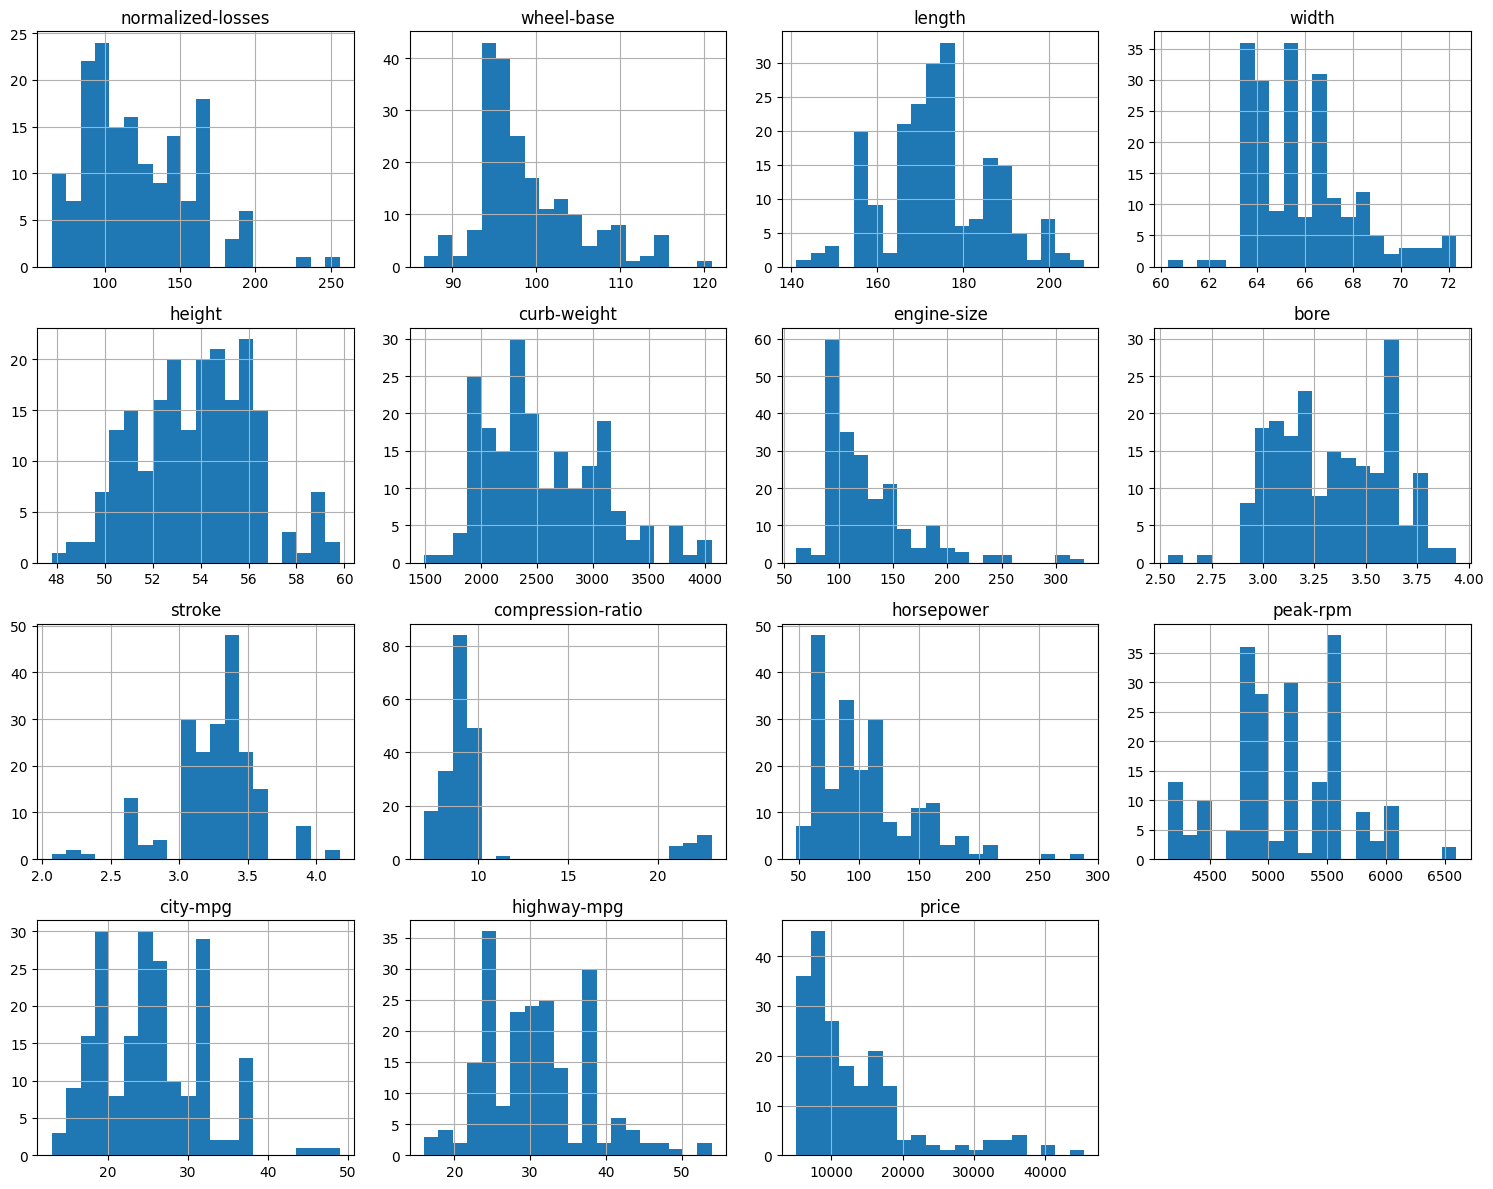

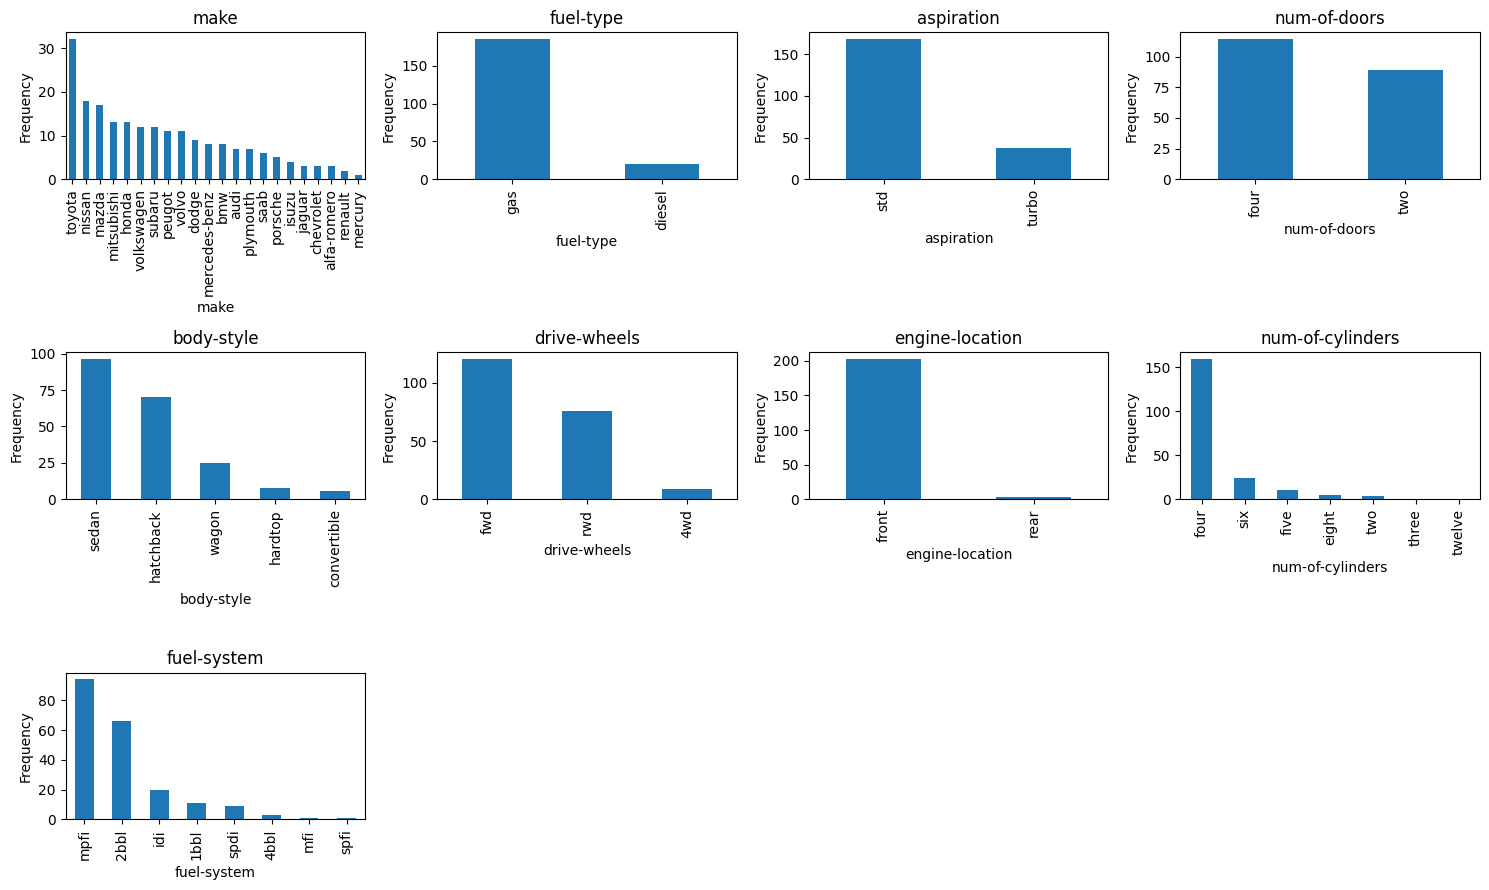

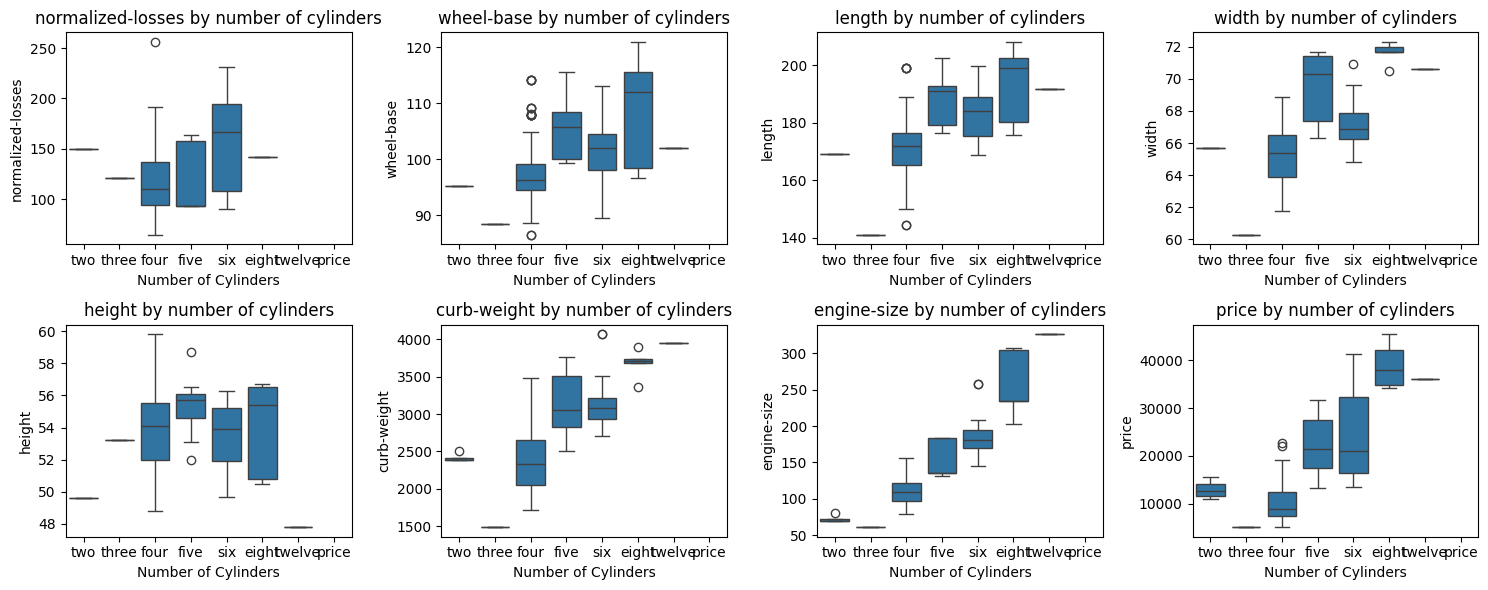

In [ ]:
#Session 1: explore individual features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
summary_stats = df[numerical_features].describe().round(2)
print(summary_stats)

# Histograms
num_numerical_features = len(numerical_features)
num_rows_hist = (num_numerical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_hist, ncols=4, figsize=(15, 3 * num_rows_hist))
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    df[feature].hist(bins=20, ax=axes[row, col])
    axes[row, col].set_title(feature)
# Remove empty subplots
for i in range(num_numerical_features, num_rows_hist * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

# Bar Plots
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders', 'fuel-system']
num_categorical_features = len(categorical_features)
num_rows_bar = (num_categorical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_bar, ncols=4, figsize=(15, 3 * num_rows_bar))
for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    df[feature].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(feature)
# Remove empty subplots
for i in range(num_categorical_features, num_rows_bar * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

# Group box plots by 'num-of-cylinders' sorted
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'price']
num_numerical_features = len(numerical_features)
num_rows_box = (num_numerical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_box, ncols=4, figsize=(15, 3 * num_rows_box))  # Adjusted figsize
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df['num-of-cylinders'], y=feature, data=df, ax=axes[row, col], order=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve', 'price'])
    axes[row, col].set_title(f'{feature} by number of cylinders')
    axes[row, col].set_xlabel('Number of Cylinders')
    axes[row, col].set_ylabel(feature)
# Remove empty subplots
for i in range(num_numerical_features, num_rows_box * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()



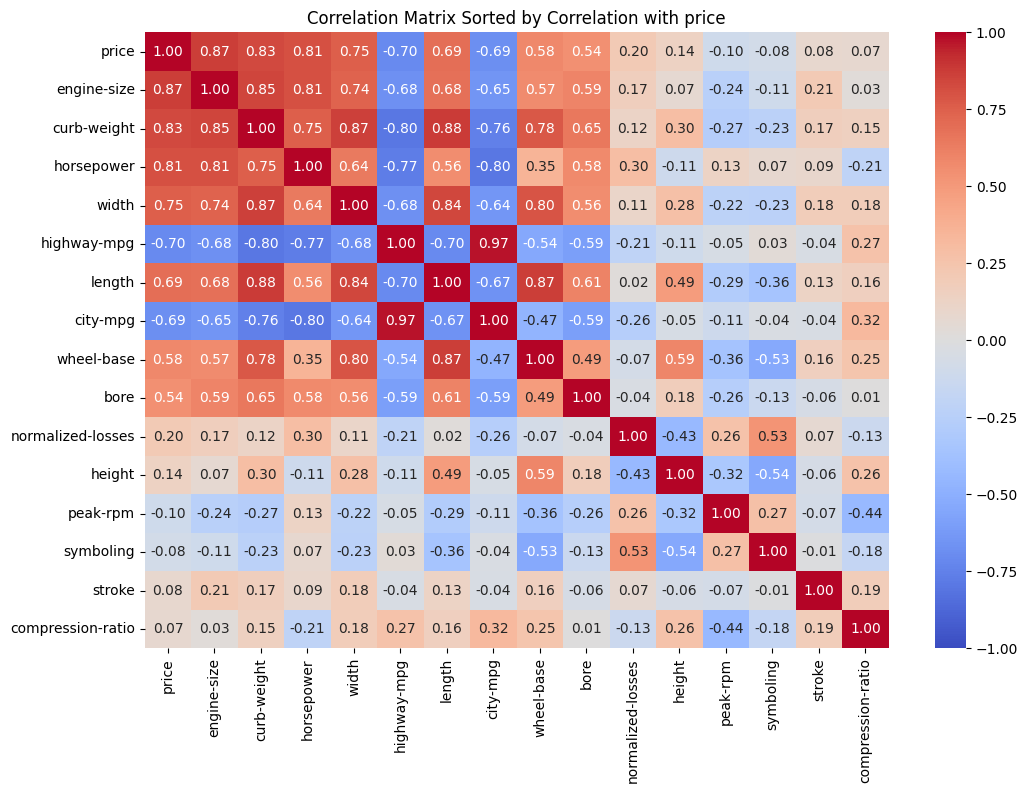

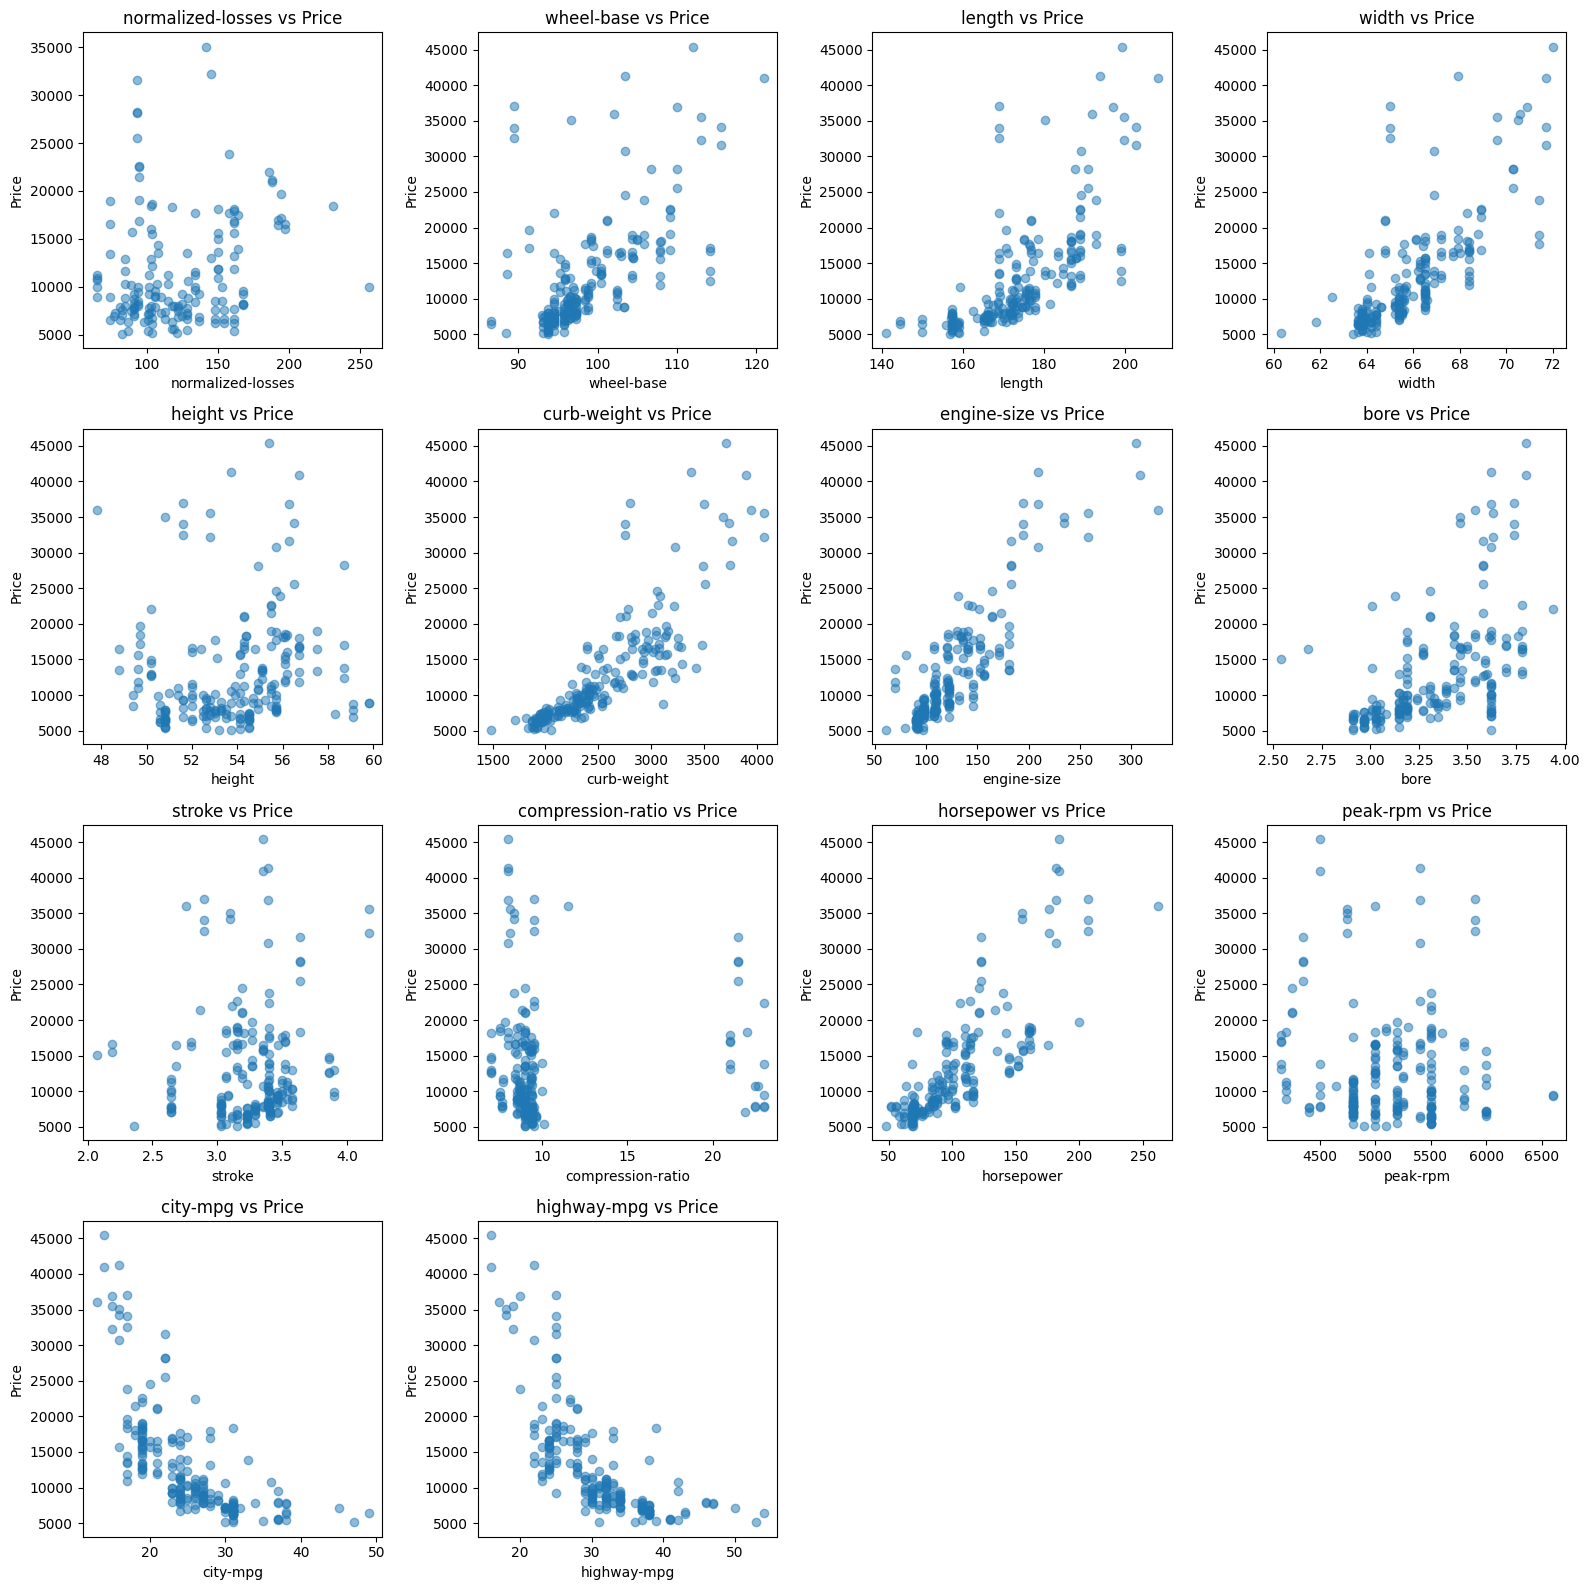

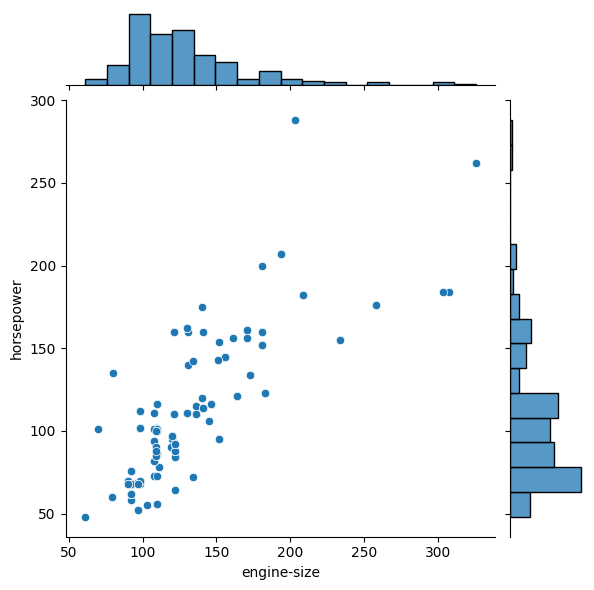

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543436
normalized-losses    0.203254
height               0.135486
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64


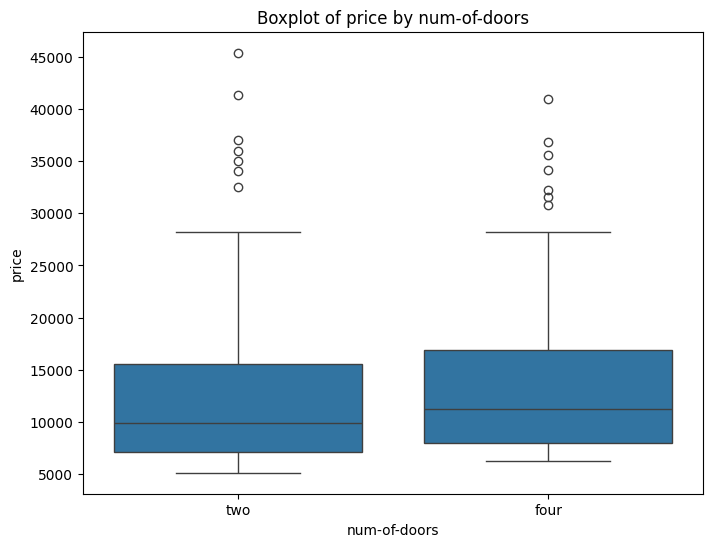

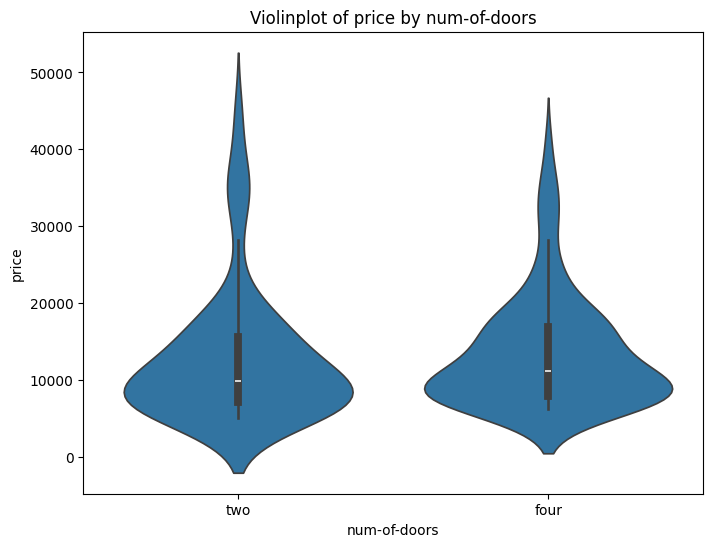

In [6]:
#Session 2 explore relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)


# Sort correlation matrix based on correlations with a specific feature (e.g., 'price')
target_feature = 'price'
sorted_corr = corr_matrix[target_feature].abs().sort_values(ascending=False)
corr_matrix_sorted = corr_matrix.loc[sorted_corr.index, sorted_corr.index]

# Plot sorted heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f'Correlation Matrix Sorted by Correlation with {target_feature}')
plt.show()

# Select numerical features (excluding 'price')
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Calculate number of plots needed
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features - 1) // num_cols + 1

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows*4))
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(df[feature], df['price'], alpha=0.5)
    axes[row, col].set_title(f'{feature} vs Price')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Price')

# Remove empty subplots
if num_features < num_cols * num_rows:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Select two numerical features
feature1 = 'engine-size'
feature2 = 'horsepower'

# Create jointplot
sns.jointplot(x=feature1, y=feature2, data=df, kind='scatter')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


# Calculate correlation with target variable
corr_with_price = df.select_dtypes(include=['float64', 'int64']).corr()['price'].sort_values(ascending=False)

# Print correlation with price
print(corr_with_price)


# Select categorical and numerical features
categorical_feature = 'num-of-doors'
numerical_feature = 'price'

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_feature, y=numerical_feature, data=df)
plt.title(f'Boxplot of {numerical_feature} by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=categorical_feature, y=numerical_feature, data=df)
plt.title(f'Violinplot of {numerical_feature} by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()



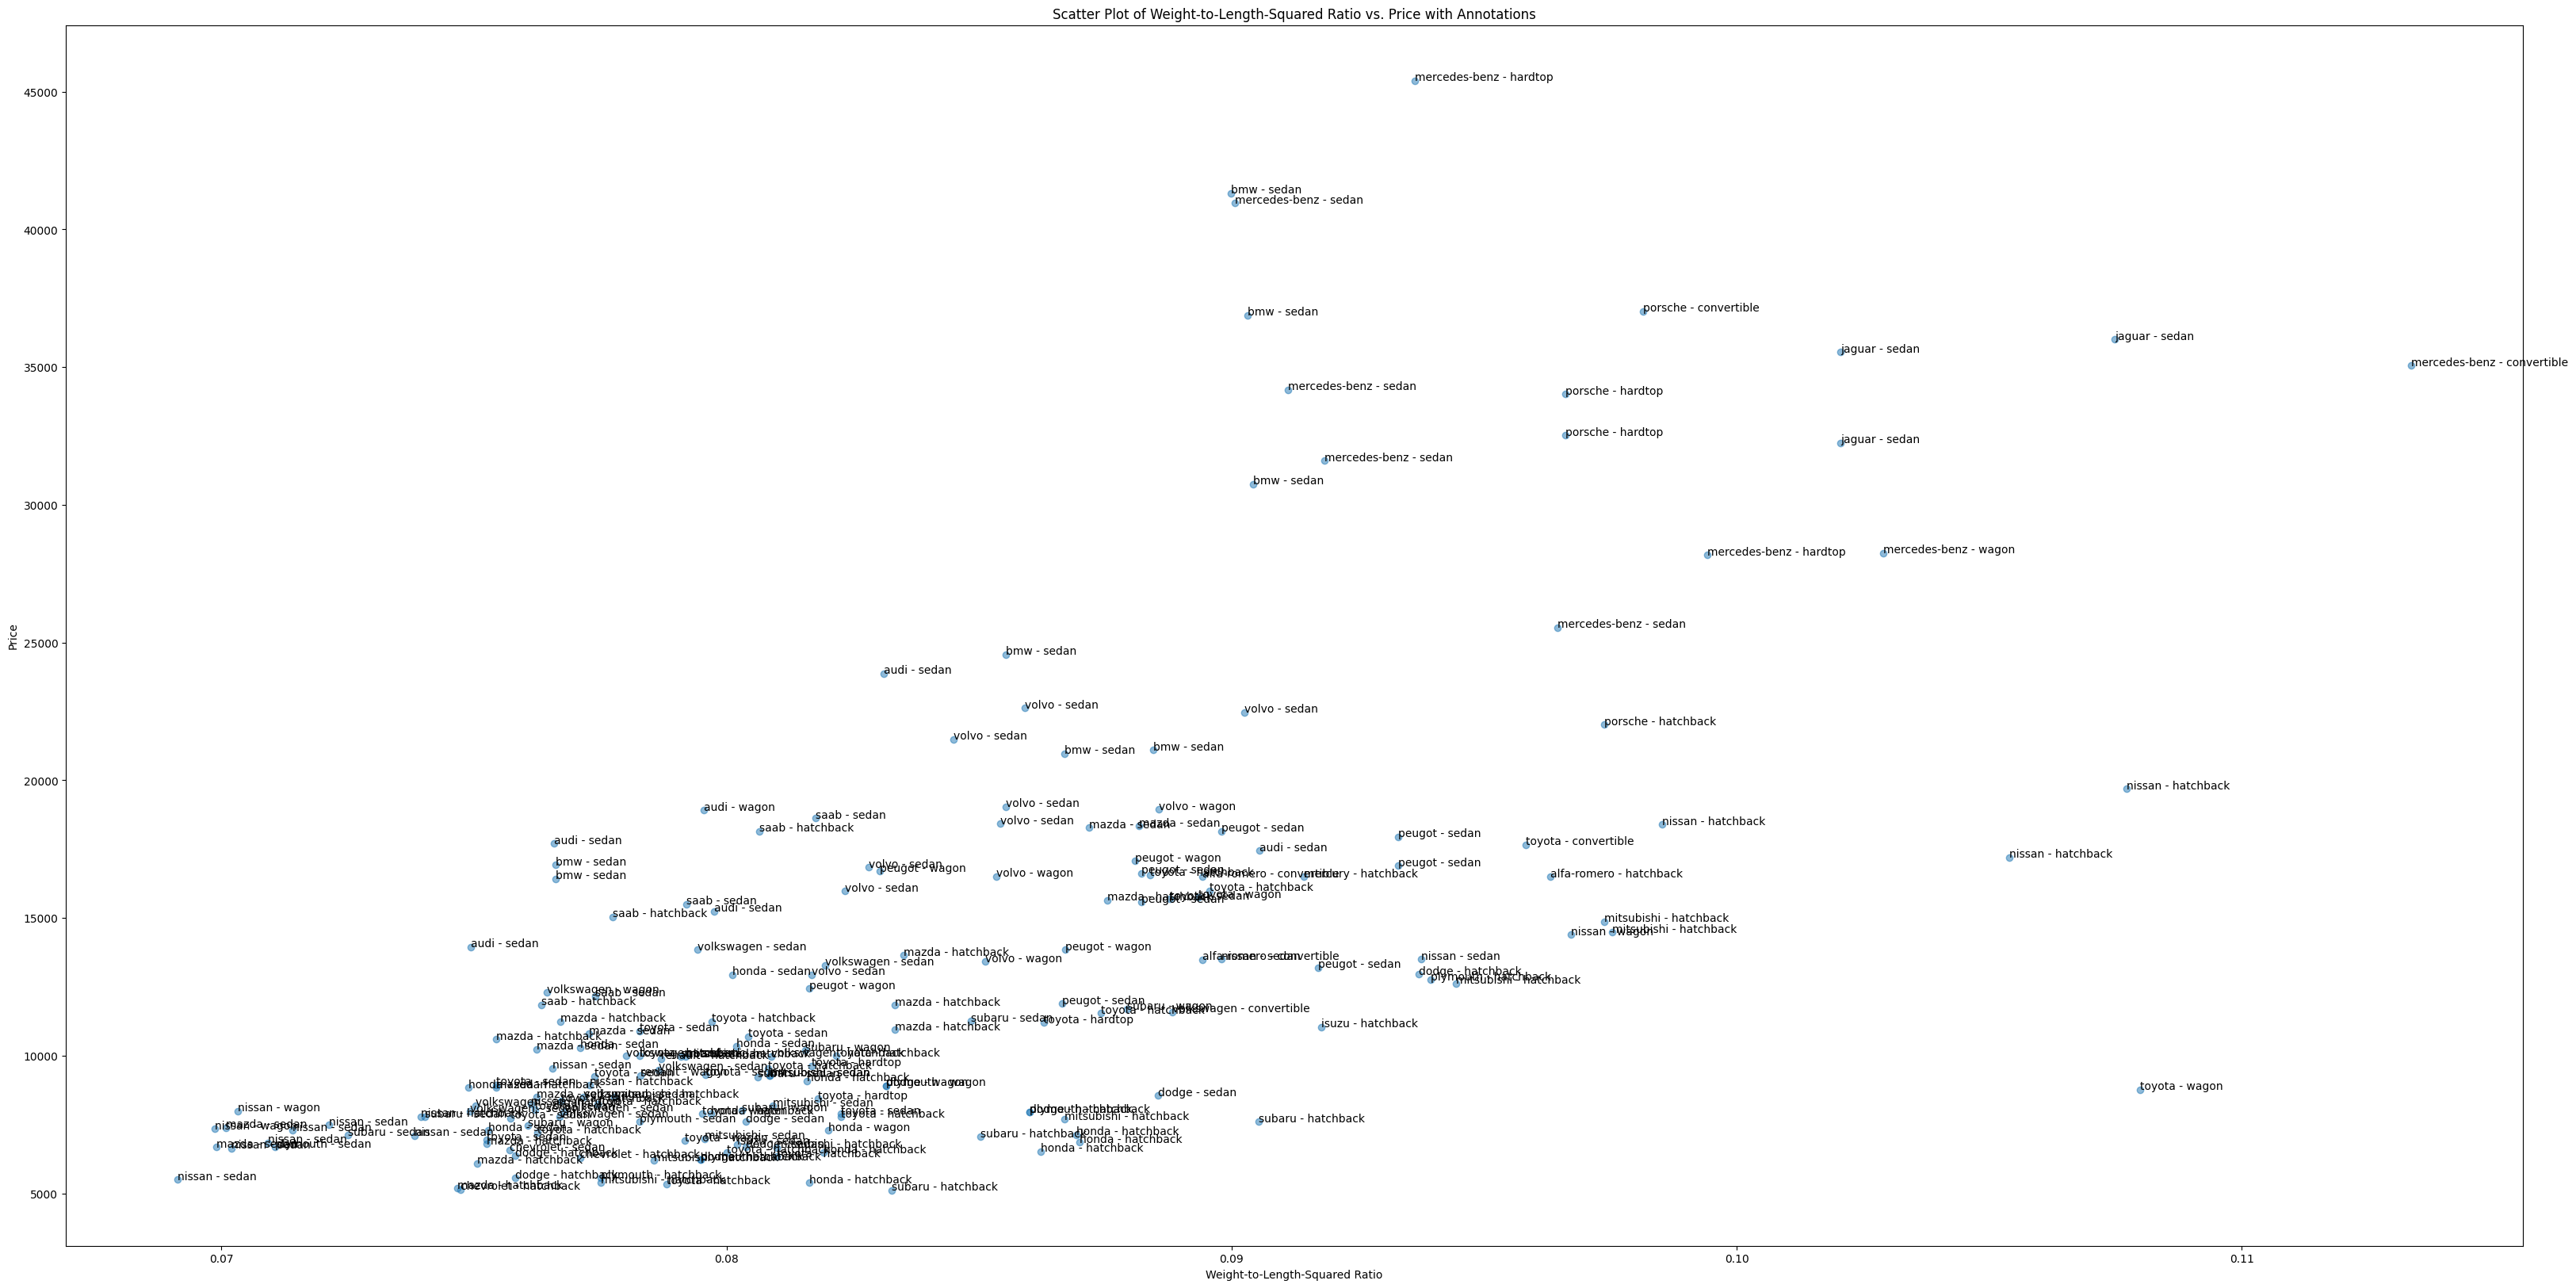

make           body-style 
porsche        convertible    37028.000000
mercedes-benz  hardtop        36788.000000
               convertible    35056.000000
jaguar         sedan          34600.000000
porsche        hardtop        33278.000000
mercedes-benz  sedan          33074.000000
               wagon          28248.000000
bmw            sedan          26118.750000
porsche        hatchback      22018.000000
audi           wagon          18920.000000
volvo          sedan          18726.875000
toyota         convertible    17669.000000
audi           sedan          17647.000000
mercury        hatchback      16503.000000
alfa-romero    hatchback      16500.000000
volvo          wagon          16293.333333
peugot         sedan          15758.571429
saab           sedan          15433.333333
peugot         wagon          15017.500000
saab           hatchback      15013.333333
alfa-romero    convertible    14997.500000
nissan         hatchback      14409.000000
volkswagen     wagon       

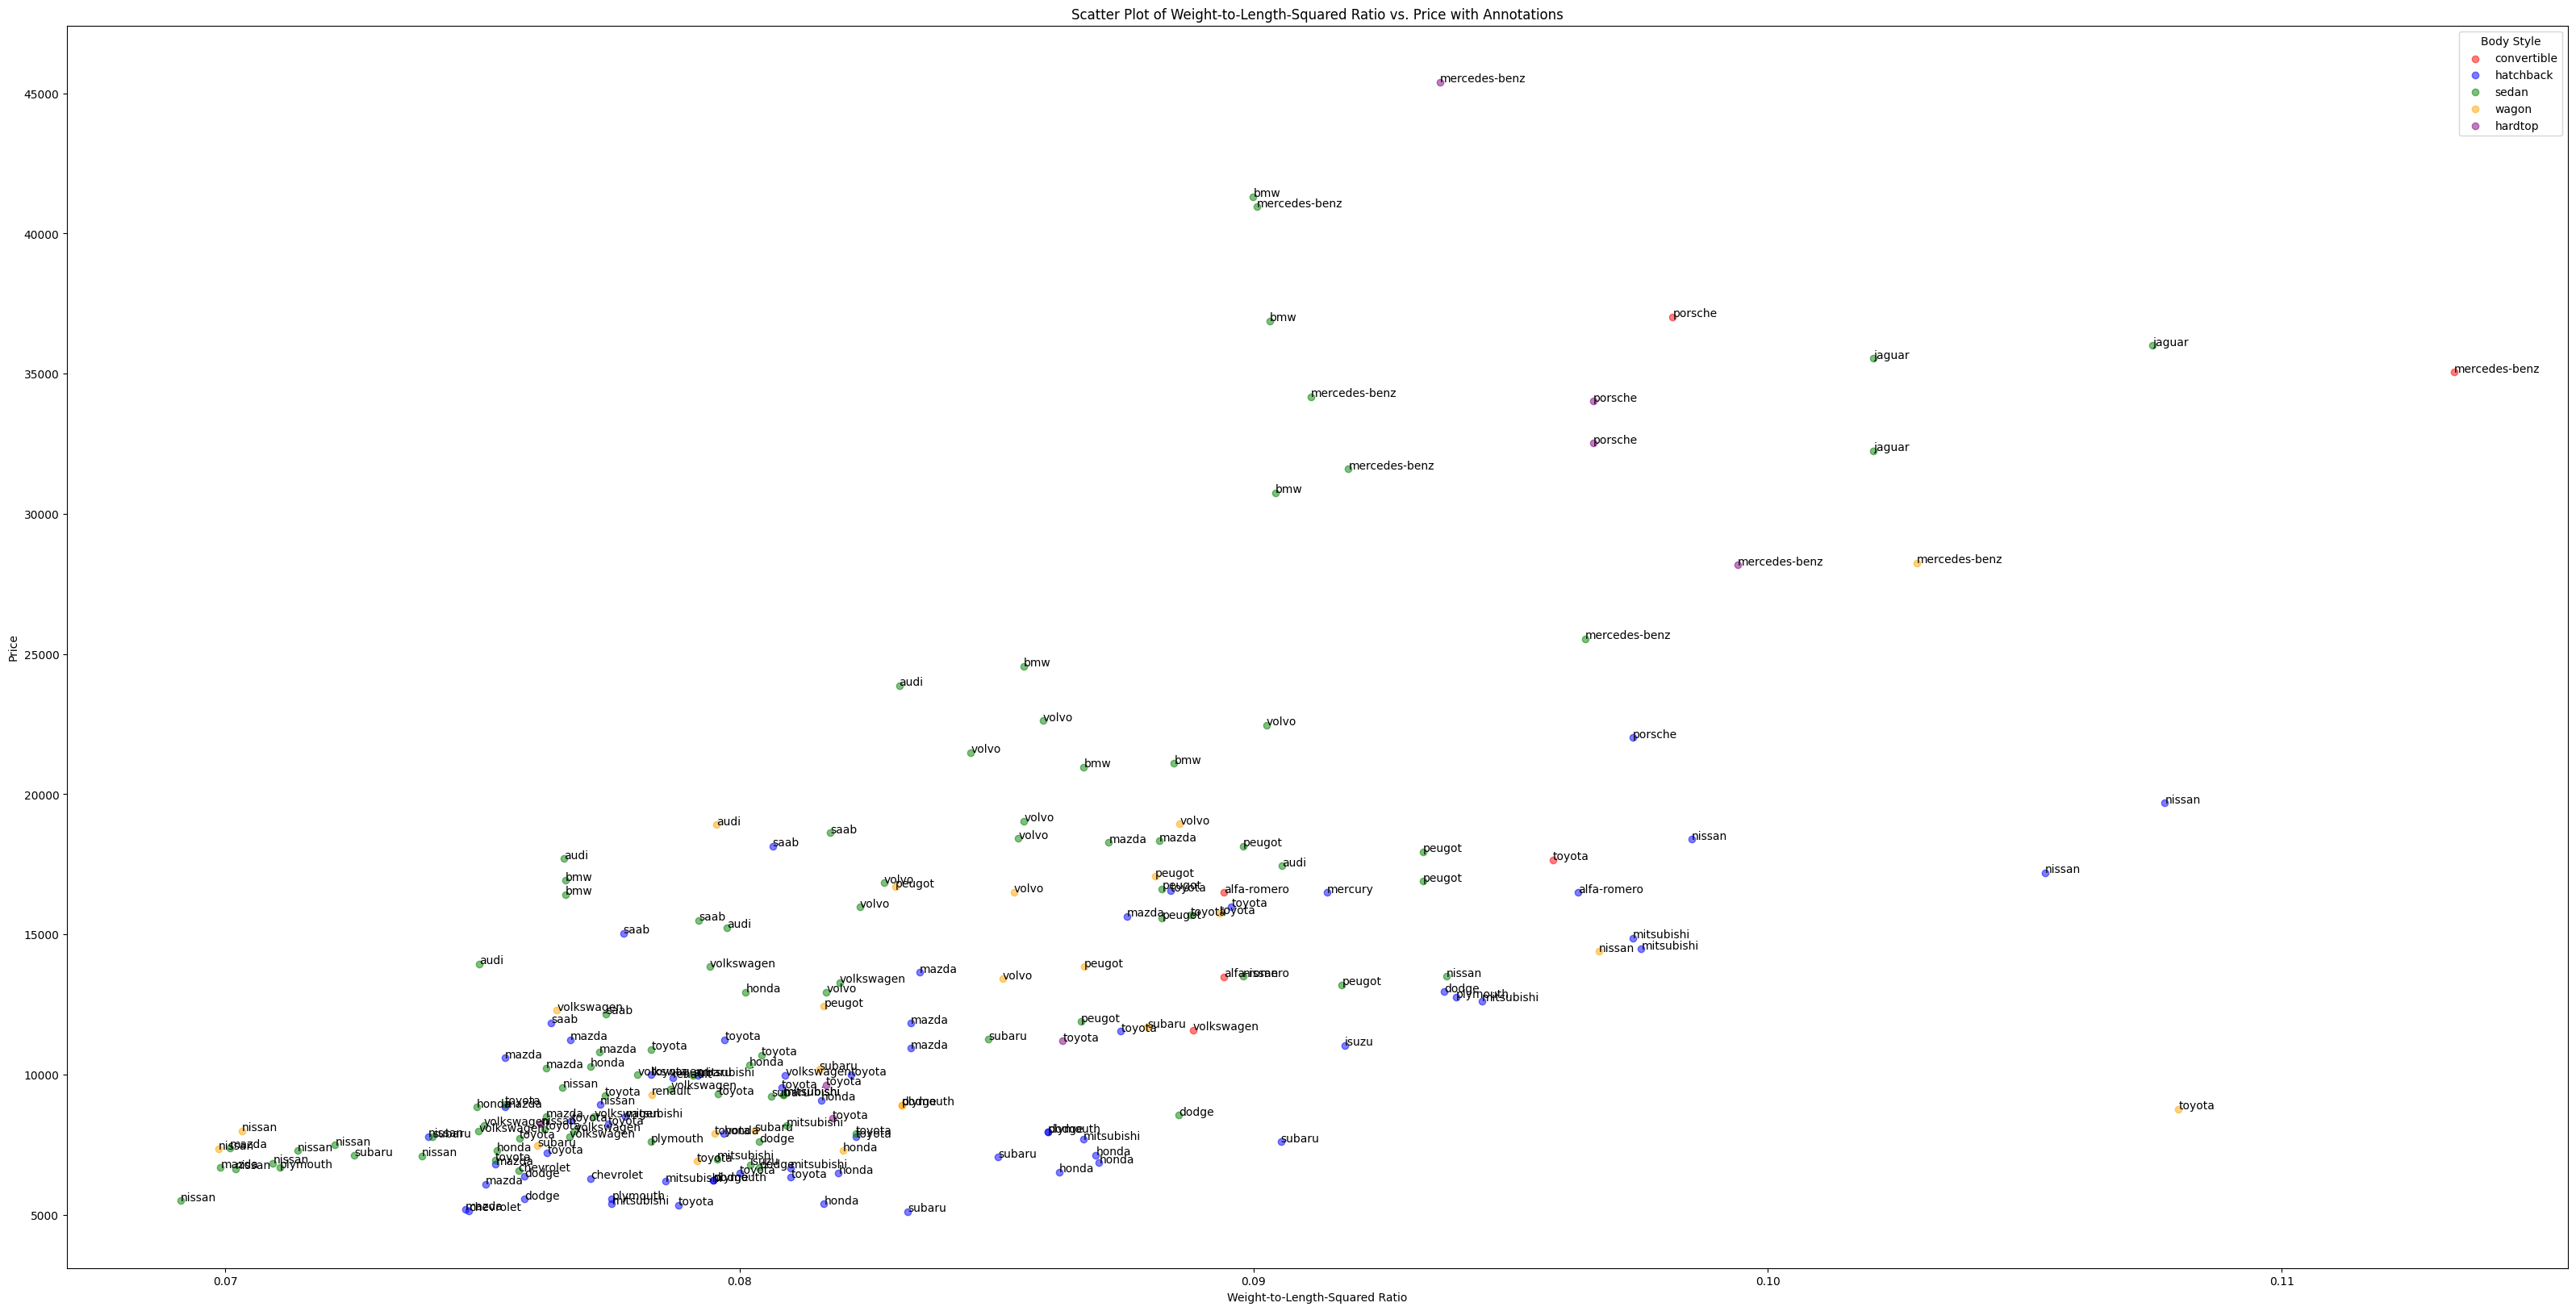

In [8]:
#Session 3: create custom visualisations.
import matplotlib.pyplot as plt


# Calculate weight-to-volume ratio using length squared
df['weight_to_length_squared_ratio'] = df['curb-weight'] / (df['length'] ** 2)

import matplotlib.pyplot as plt

# Normalize the ratio (optional)
min_ratio = df['weight_to_length_squared_ratio'].min()
max_ratio = df['weight_to_length_squared_ratio'].max()
df['normalized_weight_to_length_squared_ratio'] = (df['weight_to_length_squared_ratio'] - min_ratio) / (max_ratio - min_ratio)


# Scatter plot of 'weight_to_length_squared_ratio' vs. 'price' with annotations for car make and body style
plt.figure(figsize=(40, 20))  # Adjusted aspect ratio for horizontal stretch
plt.scatter(df['weight_to_length_squared_ratio'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Weight-to-Length-Squared Ratio vs. Price with Annotations')
plt.xlabel('Weight-to-Length-Squared Ratio')
plt.ylabel('Price')

# Add annotations for car make and body style
for i, txt in enumerate(df['make']):
    plt.annotate(f'{txt} - {df["body-style"][i]}', (df['weight_to_length_squared_ratio'][i], df['price'][i]))

plt.show()

import pandas as pd


# Group data by 'make' and 'body-style', calculate mean price for each group
mean_price_by_group = df.groupby(['make', 'body-style'])['price'].mean()

# Sort groups by mean price in descending order
mean_price_by_group_sorted = mean_price_by_group.sort_values(ascending=False)

# Display sorted mean prices
print(mean_price_by_group_sorted)

import matplotlib.pyplot as plt

# Define colors for each unique 'body-style'
colors = {'convertible': 'red', 'hatchback': 'blue', 'sedan': 'green', 'wagon': 'orange', 'hardtop': 'purple'}

# Scatter plot of 'weight_to_length_squared_ratio' vs. 'price' with annotations for car make and body style
plt.figure(figsize=(40, 20))
for body_style, color in colors.items():
    plt.scatter(df[df['body-style'] == body_style]['weight_to_length_squared_ratio'],
                df[df['body-style'] == body_style]['price'],
                alpha=0.5,
                c=color,
                label=body_style)

plt.title('Scatter Plot of Weight-to-Length-Squared Ratio vs. Price with Annotations')
plt.xlabel('Weight-to-Length-Squared Ratio')
plt.ylabel('Price')
plt.legend(title='Body Style')

# Add annotations for car make and body style
for i, txt in enumerate(df['make']):
    plt.annotate(f'{txt}', (df['weight_to_length_squared_ratio'][i], df['price'][i]))

plt.show()



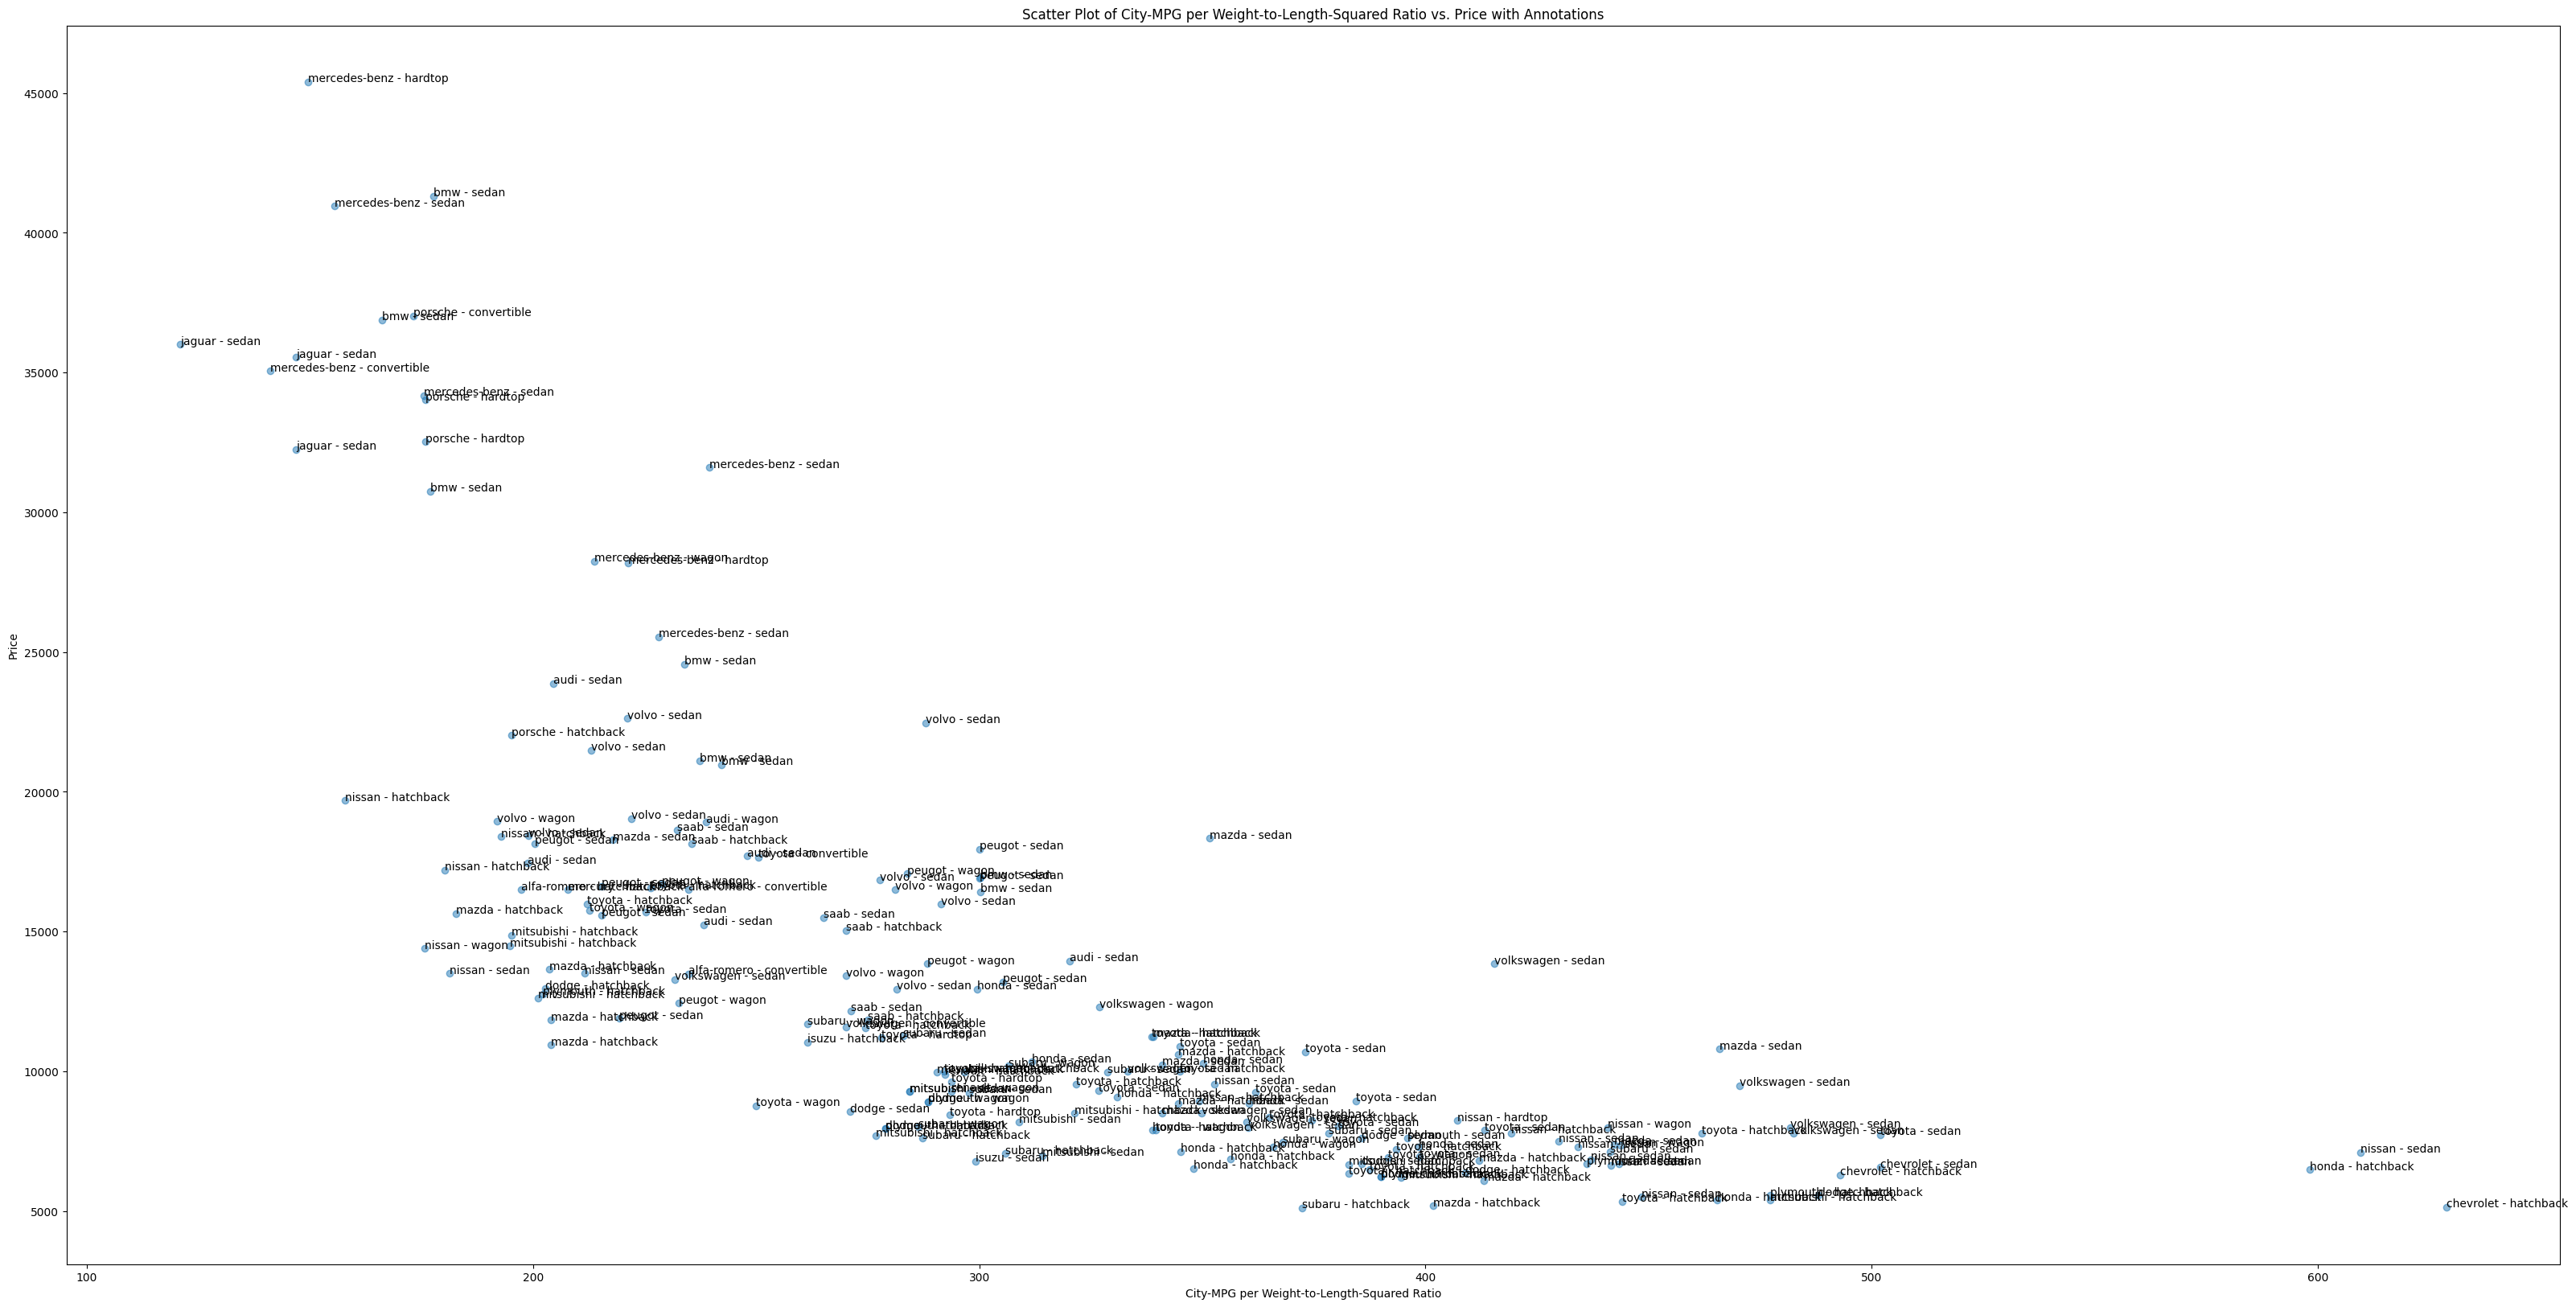

make           body-style 
chevrolet      hatchback      560.846533
               sedan          501.971042
isuzu          sedan          425.294925
plymouth       sedan          416.123939
nissan         hardtop        407.164622
honda          hatchback      397.518220
nissan         sedan          394.025665
volkswagen     sedan          387.255190
mazda          sedan          371.891660
toyota         sedan          371.055657
honda          wagon          365.816354
dodge          hatchback      353.731230
nissan         wagon          353.430474
dodge          sedan          347.439878
subaru         sedan          345.775190
toyota         hatchback      344.240604
honda          sedan          344.104967
plymouth       hatchback      337.148798
volkswagen     wagon          327.015314
subaru         hatchback      321.746680
               wagon          305.648598
mazda          hatchback      304.928223
mitsubishi     hatchback      303.828383
toyota         wagon          

In [ ]:
# Calculate city-mpg per weight_to_length_squared_ratio
df['city_mpg_per_weight_to_length_squared_ratio'] = df['city-mpg'] / df['weight_to_length_squared_ratio']

import matplotlib.pyplot as plt

# Normalize the ratio (optional)
min_ratio = df['city_mpg_per_weight_to_length_squared_ratio'].min()
max_ratio = df['city_mpg_per_weight_to_length_squared_ratio'].max()
df['normalized_city_mpg_per_weight_to_length_squared_ratio'] = (df['city_mpg_per_weight_to_length_squared_ratio'] - min_ratio) / (max_ratio - min_ratio)

# Scatter plot of 'city_mpg_per_weight_to_length_squared_ratio' vs. 'price' with annotations for car make and body style
plt.figure(figsize=(40, 20))  # Adjusted aspect ratio for horizontal stretch
plt.scatter(df['city_mpg_per_weight_to_length_squared_ratio'], df['price'], alpha=0.5)
plt.title('Scatter Plot of City-MPG per Weight-to-Length-Squared Ratio vs. Price with Annotations')
plt.xlabel('City-MPG per Weight-to-Length-Squared Ratio')
plt.ylabel('Price')

# Add annotations for car make and body style
for i, txt in enumerate(df['make']):
    plt.annotate(f'{txt} - {df["body-style"][i]}', (df['city_mpg_per_weight_to_length_squared_ratio'][i], df['price'][i]))

plt.show()

# Group data by 'make' and 'body-style', calculate mean city_mpg_per_weight_to_length_squared_ratio for each group
mean_city_mpg_by_group = df.groupby(['make', 'body-style'])['city_mpg_per_weight_to_length_squared_ratio'].mean()

# Sort groups by mean city_mpg_per_weight_to_length_squared_ratio in descending order
mean_city_mpg_by_group_sorted = mean_city_mpg_by_group.sort_values(ascending=False)

# Display sorted mean city_mpg_per_weight_to_length_squared_ratio
print(mean_city_mpg_by_group_sorted)


In [ ]:
import pandas as pd

# Select size-related features
size_features = ['wheel-base', 'length', 'width', 'height']

# Calculate standard deviation for each feature
std_deviation = df[size_features].std()

# Display standard deviation
print(std_deviation)


wheel-base     6.021776
length        12.337289
width          2.145204
height         2.443522
dtype: float64


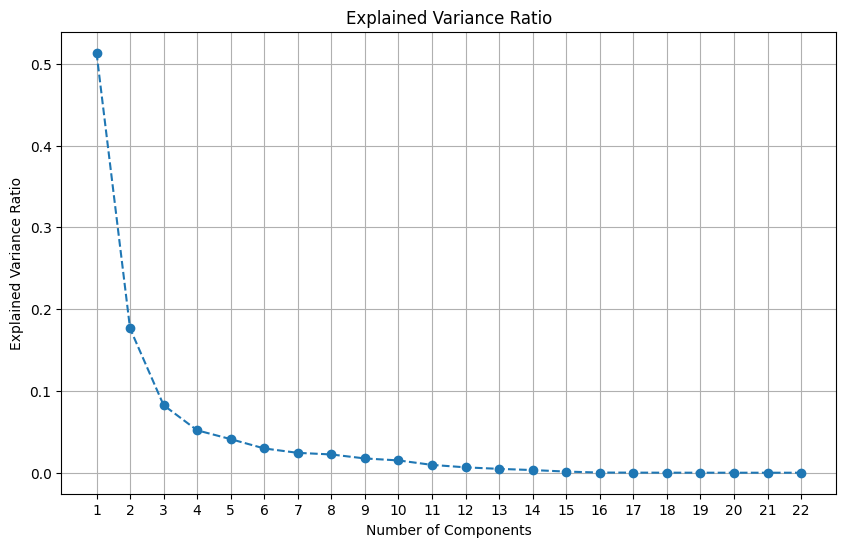

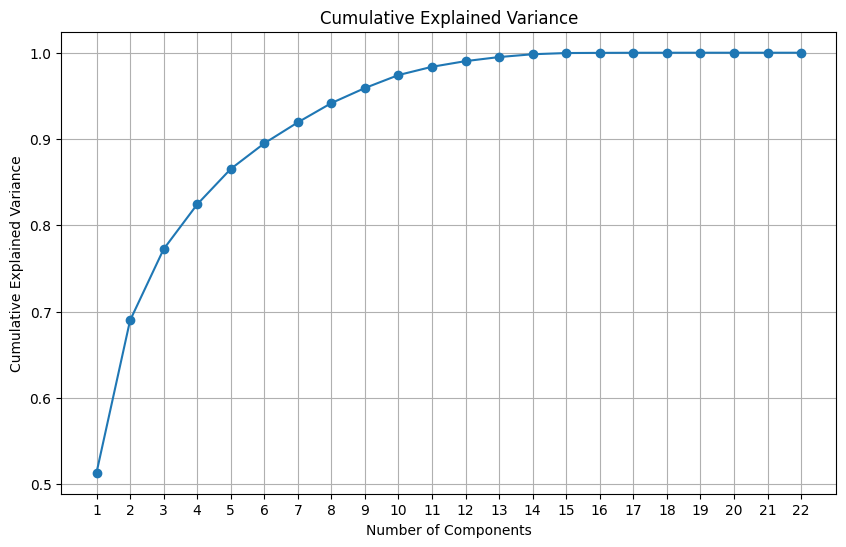

Number of components to retain: 7


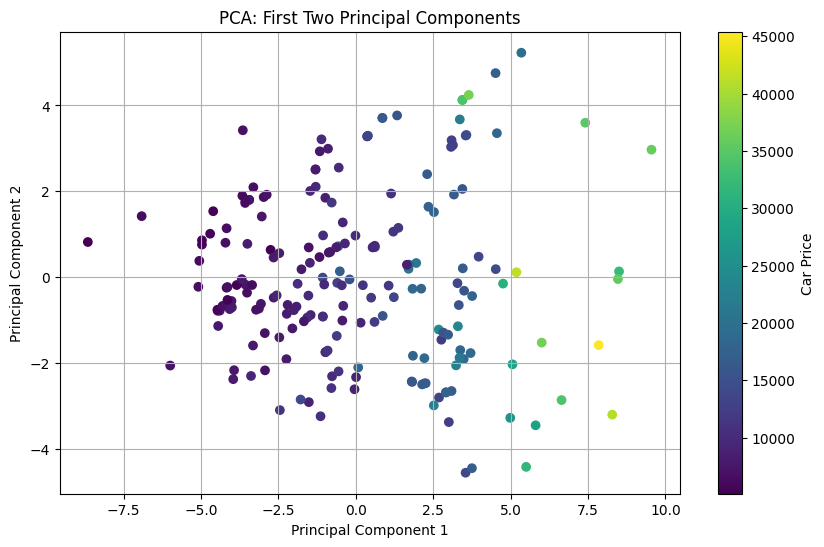

Top positive loadings for PC1:
                             PC1       PC2       PC3       PC4       PC5  \
curb-weight             0.965095 -0.203472  0.099182 -0.036269  0.028061   
engine-size             0.863613 -0.024608  0.171518 -0.004841 -0.038543   
weight_to_volume_ratio  0.861810  0.382804  0.287106  0.089368 -0.016846   

                             PC6       PC7  
curb-weight             0.059621  0.026971  
engine-size            -0.160714  0.236716  
weight_to_volume_ratio  0.032100  0.043307  
Top negative loadings for PC1:
                                                         PC1       PC2  \
normalized_city_mpg_per_weight_to_length_square... -0.925930 -0.213976   
city_mpg_per_weight_to_length_squared_ratio        -0.925930 -0.213976   
highway-mpg                                        -0.898149 -0.100706   

                                                         PC3       PC4  \
normalized_city_mpg_per_weight_to_length_square...  0.225447 -0.027740   
city_mpg

In [ ]:
# Session 4: apply PCA and summarise key insights.
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Exclude non-numeric columns and price from numeric_cols
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['price']).columns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Determine the number of components to retain
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print("Number of components to retain:", n_components)

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['price'], cmap='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Car Price')
plt.grid(True)
plt.show()

# Get the loadings (coefficients) of original features on each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to show loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=numeric_cols)

# Show the top positive and negative loadings for each principal component
for i in range(n_components):
    print(f"Top positive loadings for PC{i+1}:")
    print(loadings_df.sort_values(by=f'PC{i+1}', ascending=False).head(3))
    print(f"Top negative loadings for PC{i+1}:")
    print(loadings_df.sort_values(by=f'PC{i+1}', ascending=True).head(3))
    print()



